In [2]:
import os
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
sp.random.seed(3)

In [5]:
data = sp.genfromtxt("data/web_traffic.tsv", delimiter="\t")

In [6]:
print(data[:10])

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]


In [7]:
print(data.shape)

(743, 2)


In [8]:
colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']

In [9]:
x = data[:, 0]
y = data[:, 1]

In [42]:
print("Número de entradas inválidas:", sp.sum(sp.isnan(y)))

Número de entradas inválidas: 0


In [11]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

In [27]:
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    ''' plot input data '''

    plt.figure(num=None, figsize=(8, 6))
    plt.clf()
    plt.scatter(x, y, s=10)
    plt.title("Tráfico web durante el último mes")
    plt.xlabel("Tiempo")
    plt.ylabel("éxito/hora")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['semana %i' % w for w in range(10)])

    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=3, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)

### Vista de los datos

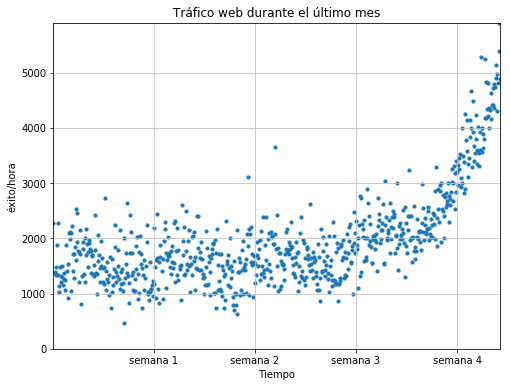

In [28]:
plot_models(x, y, None, os.path.join("1400_01_01.png"))

### crear y trazar modelos

In [17]:
fp1, res1, rank1, sv1, rcond1 = sp.polyfit(x, y, 1, full=True)

In [43]:
print("Parámetros del modelo de fp1: %s" % fp1)

Parámetros del modelo de fp1: [  2.59619213 989.02487106]


In [192]:
print("Error del modelo de fp1:", res1)

Error del modelo de fp1: [3.17389767e+08]


In [193]:
f1 = sp.poly1d(fp1)

In [194]:
fp2, res2, rank2, sv2, rcond2 = sp.polyfit(x, y, 2, full=True)

In [195]:
print("Parámetros del modelo de fp2: %s" % fp2)

Parámetros del modelo de fp2: [ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]


In [196]:
print("Error del modelo de fp2:", res2)

Error del modelo de fp2: [1.79983508e+08]


In [197]:
f2 = sp.poly1d(fp2)
f3 = sp.poly1d(sp.polyfit(x, y, 3))
f10 = sp.poly1d(sp.polyfit(x, y, 10))
f100 = sp.poly1d(sp.polyfit(x, y, 100))

C:\Users\INSPIRON\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:583: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\INSPIRON\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\Users\INSPIRON\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


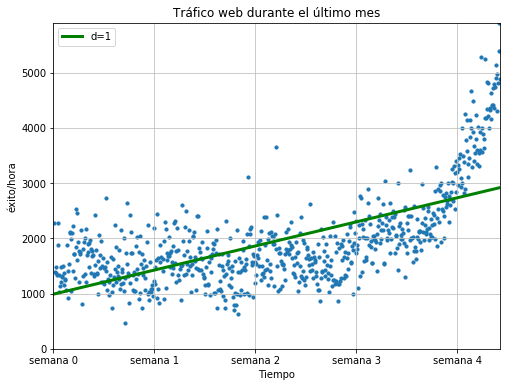

In [198]:
plot_models(x, y, [f1], os.path.join("1400_01_02.png"))

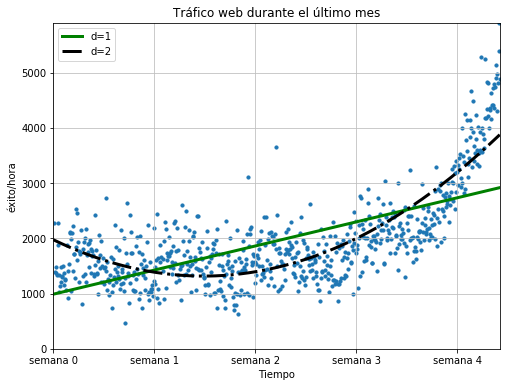

In [199]:
plot_models(x, y, [f1, f2], os.path.join("1400_01_03.png"))

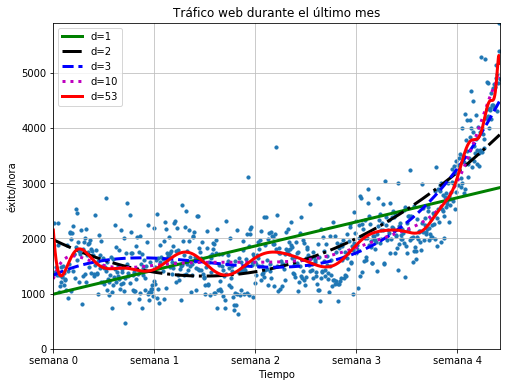

In [200]:
plot_models(
    x, y, [f1, f2, f3, f10, f100], os.path.join("1400_01_04.png"))

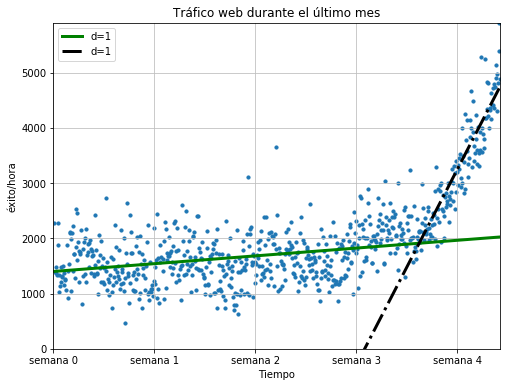

In [305]:
inflection = 3.5 * 7 * 24
xa = x[:int(inflection)]
ya = y[:int(inflection)]
xb = x[int(inflection):]
yb = y[int(inflection):]
xa = list(map(int, xa))
ya = list(map(int, ya))
xb = list(map(int, xb))
yb = list(map(int, yb))


fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

plot_models(x, y, [fa, fb], os.path.join("1400_01_05.png"))

In [306]:
def error(f, x, y):
    return sp.sum((f(x) - y) ** 2)


In [307]:
print("Errores para el conjunto completo de datos:")

Errores para el conjunto completo de datos:


In [308]:
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))


Error d=1: 317389767.339778
Error d=2: 179983507.878179
Error d=3: 139350144.031725
Error d=10: 121942326.363548
Error d=53: 109452402.922606


In [309]:
print("Errores solo por el tiempo después del punto de inflexión")

Errores solo por el tiempo después del punto de inflexión


In [310]:
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))


Error d=1: 145045835.134473
Error d=2: 61116348.809620
Error d=3: 33214248.905597
Error d=10: 21611594.263904
Error d=53: 18656103.653553


In [311]:
print("Inflexión de error=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))

Inflexión de error=132950348.197616


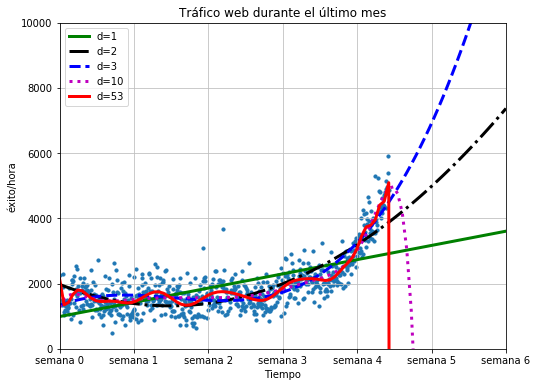

In [312]:
plot_models(
    x, y, [f1, f2, f3, f10, f100],
    os.path.join("1400_01_06.png"),
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)


In [313]:
print("Entrenado solo en datos después del punto de inflexión")

Entrenado solo en datos después del punto de inflexión


In [314]:
fb1 = fb
fb2 = sp.poly1d(sp.polyfit(xb, yb, 2))
fb3 = sp.poly1d(sp.polyfit(xb, yb, 3))
fb10 = sp.poly1d(sp.polyfit(xb, yb, 10))
fb100 = sp.poly1d(sp.polyfit(xb, yb, 100))

C:\Users\INSPIRON\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
C:\Users\INSPIRON\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:583: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\INSPIRON\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\Users\INSPIRON\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """


In [315]:
print("Errores solo por el tiempo después del punto de inflexión")

Errores solo por el tiempo después del punto de inflexión


In [316]:
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))


Error d=1: 22143941.107618
Error d=2: 19768846.989176
Error d=3: 19766452.361027
Error d=10: 18949296.784337
Error d=53: 18300791.400089


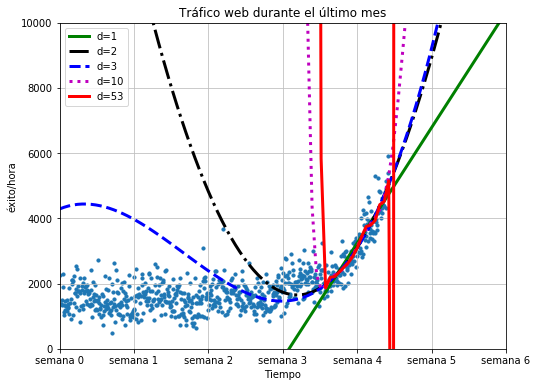

In [317]:
plot_models(
    x, y, [fb1, fb2, fb3, fb10, fb100],
    os.path.join("1400_01_07.png"),
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)


In [318]:
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(0, len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])

#fbt1 = sp.poly1d(sp.polyfit(xb, yb, 1))
#fbt2 = sp.poly1d(sp.polyfit(xb, yb, 2))

In [319]:
xb = set([xb[x] for x in range(len(train))])
xb = list(xb)

yb = set([yb[x] for x in range(len(train))])
yb = list(yb)


fbt1 = sp.poly1d(sp.polyfit(xb, yb, 1))
fbt2 = sp.poly1d(sp.polyfit(xb, yb, 2))

In [320]:
print("fbt2(x)= \n%s" % fbt2)

fbt2(x)= 
         2
-0.1071 x + 137 x - 4.1e+04


In [321]:
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))

fbt2(x)-100,000= 
         2
-0.1071 x + 137 x - 1.41e+05


In [322]:
xb = set([xb[x] for x in range(len(train))])
xb = list(xb)

yb = set([yb[x] for x in range(len(train))])
yb = list(yb)

fbt3 = sp.poly1d(sp.polyfit(xb, yb, 3))
fbt10 = sp.poly1d(sp.polyfit(xb, yb, 10))
fbt100 = sp.poly1d(sp.polyfit(xb, yb, 100))

C:\Users\INSPIRON\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\INSPIRON\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:583: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\INSPIRON\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\Users\INSPIRON\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RankWarning: Polyfit may be poorly conditioned
  if __name__ == '__main__':


In [323]:
print("Errores de prueba solo por el tiempo después del punto de inflexión")

Errores de prueba solo por el tiempo después del punto de inflexión


In [324]:

for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))


Error d=1: 46736951.220270
Error d=2: 45998905.172118
Error d=3: 44560979.728401
Error d=10: 43197252.037126
Error d=54: 39658205.453613


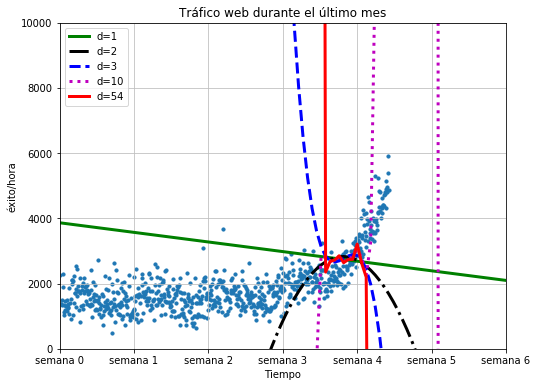

In [325]:
plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],
    os.path.join("1400_01_08.png"),
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)


In [326]:
from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 100000)
reached_max = fsolve(fbt2 - 100000, x0=800) / (7 * 24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

         2
-0.1071 x + 137 x - 4.1e+04
         2
-0.1071 x + 137 x - 1.41e+05
100,000 hits/hour expected at week 3.824480


C:\Users\INSPIRON\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
